<div align="center" style="font-family: 'Garamond', serif; color: #333333;">
    <h2 style="color: #8b0000; text-decoration: underline; font-variant: small-caps;">
        <span style="font-family: 'Courier New', monospace;">&#9472;</span>
        Reinforcement Learning Summer 2024
        <span style="font-family: 'Courier New', monospace;">&#9472;</span>
    </h2>
    <h2 style="color: #6c757d;">Prof. Dr. Frank Kirchner</h2>
    <h4 style="color: #6c757d; font-style: italic;">Exercise Sheet – I</h4>
    <h5 style="color: #6c757d;">Due: 30.04.25</h5>
    <hr style="border-top: 2px solid #8b0000; width: 100%;">
</div>

### Group = 9  

### Muhammad Ahsan  
**Email:** muahsan@uni-bremen.de

### Huzaifa Sajid  
**Email:** hsajid@uni-bremen.de


## Problem 1.1 (Installation & Framework)

For this course, we make use of the **gymnasium framework**. Gymnasium is a standard API for reinforcement learning and also provides a broad collection of environments we will discuss during this course. The documentation of the framework can be found at [gymnasium.farama.org](http://gymnasium.farama.org).

Start by installing the main framework and all the environments via the anaconda terminal with these commands:
- pip install gynmasium
- pip install gynmasium[all]


### a) Try to run the code from the main page of the gymnasium documentation. 

You can fix possible errors related to Microsoft Visual C++ 14.0 by downloading the Microsoft C++ Build Tools and installing the missing package.

**Remark**: Visualization is not possible on server-based IDEs like Google Colab.

### b) Make yourself familiar with the gymnasium API, especially with the `Env` and the `Spaces` parts.


In [ ]:
# Todo: Install the required libraries, test them by running the code from main page & familiarise yourself with the gymnasium API

---
### Problem 1.2 (Markov Decision Processes) (10 P.)
Using the framework you are now supposed to implement a simple environment
yourself with the help of this 
[tutorial](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/). (You do not need 
to run the code in the beginning)

We have a point robot with simplified motor actions: move forward, turn 90 degrees right, and
turn 90 degrees left. All actions can be tried in all states. A simple version of the robot world and 
its states are shown in Figure 1. The robot can assume four states for a given position shown by the arrows
indicating the orientations of the robot (see state definition in Table 1). In the table N, E, S, and W
stand for north, east, south, and west, respectively. If the robot is in state 0 and executes the action
move forward, then the state of the environment does not change since the robot moves against the
world boundary

**Figure 1: The Robot world**

<p style="text-align:center;">
<img src="RobotWorld.jpg" alt="Robot world" width="500">
</p>


<p align="center">
  
### Table 1: The state definition of the perceived states

</p>

<div style="margin: 0 auto; width: 50%;">
  
<table>
  <tr>
    <th>State</th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
    <th>14</th>
    <th>15</th>
  </tr>
  <tr>
    <td><strong>Position</strong></td>
    <td>I</td>
    <td>I</td>
    <td>I</td>
    <td>I</td>
    <td>II</td>
    <td>II</td>
    <td>II</td>
    <td>II</td>
    <td>III</td>
    <td>III</td>
    <td>III</td>
    <td>III</td>
    <td>IV</td>
    <td>IV</td>
    <td>IV</td>
    <td>IV</td>
  </tr>
  <tr>
    <td><strong>Orientation</strong></td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
    <td>N</td>
    <td>E</td>
    <td>S</td>
    <td>W</td>
  </tr>
</table>

</div>

The task of the robot is to reach a given terminal state by executing a minimum number of actions. In this exercise, we take state 15 as a terminal state. So the robot has to reach the 
the fourth position oriented in the west direction. The dynamics of the environment are given by 

$$
\begin{array}{l}
    P_{ss'}^a = \left\{
    \begin{array}{ll}
        1 & \text{if $s'$ is a valid next state} \\
        0 & \text{otherwise}
    \end{array} \right. \\
                    \\
    R_{ss'}^a = \left\{
    \begin{array}{ll}
        -1 & \text{if $s' = s$ and $s' \neq$ terminal state}  \\
        1 & \text{if $s' \neq s$ and $s' =$ terminal state}\\
        0 & \text{otherwise}
    \end{array} \right.
\end{array}
\tag{1}
$$


where $ P_{ss'}^a $ is the state transition probability and $ R_{ss'}^a $ is the expected immediate reward. One can easily see that the robot is discouraged to take actions against the world boundary.



### **1.2 A:  (5 points)** Modify the  following cell ` The robot world` according to the description above.

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import pygame
import numpy as np
from gymnasium.envs.registration import register

In [ ]:
class RobotWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None):
        # Define the state and action spaces
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(3)  # 0: forward, 1: right, 2: left

        # Define the position mappings (pos_num to (x, y))
        self.pos_to_xy = [(0, 0), (0, 1), (1, 1), (1, 0)]
        self.termination_state = 15  # State 15 is terminal (position IV, West)

        # Rendering attributes
        self.size = 2  # 2x2 grid
        self.window_size = 512
        self.render_mode = render_mode
        self.window = None
        self.clock = None

        # Initialize agent and target positions
        self._agent_state = None
        self._target_location = np.array([1, 0], dtype=int)  # Position IV (1,0)

    def _get_obs(self):
        return self._agent_state

    def _get_info(self):
        return {"state": self._agent_state}

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        # Randomly initialize the agent's state (0-14)
        self._agent_state = self.np_random.integers(0, 15)
        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, info

    def step(self, action):
        current_state = self._agent_state
        pos_num = current_state // 4
        orient = current_state % 4

        if action == 0:  # Move forward
            x, y = self.pos_to_xy[pos_num]
            new_x, new_y = x, y
            if orient == 0:  # North
                new_y -= 1
            elif orient == 1:  # East
                new_x += 1
            elif orient == 2:  # South
                new_y += 1
            else:  # West
                new_x -= 1

            # Check if new position is valid
            if 0 <= new_x < 2 and 0 <= new_y < 2:
                new_pos_num = self.pos_to_xy.index((new_x, new_y))
            else:
                new_pos_num = pos_num

            new_state = new_pos_num * 4 + orient
        elif action == 1:  # Turn right
            new_orient = (orient + 1) % 4
            new_state = pos_num * 4 + new_orient
        elif action == 2:  # Turn left
            new_orient = (orient - 1) % 4
            new_state = pos_num * 4 + new_orient
        else:
            raise ValueError(f"Invalid action {action}")

        # Calculate reward
        terminated = new_state == self.termination_state
        if new_state == current_state:
            reward = -1 if not terminated else 0
        else:
            reward = 1 if terminated else 0

        self._agent_state = new_state
        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, reward, terminated, False, info

    def render(self):
        if self.render_mode == "rgb_array":
            return self._render_frame()

    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size, self.window_size))
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = self.window_size / self.size

        # Draw target (position IV)
        pygame.draw.rect(
            canvas,
            (255, 0, 0),
            pygame.Rect(
                pix_square_size * self._target_location,
                (pix_square_size, pix_square_size),
            ),
        )

        # Draw agent
        agent_pos_num = self._agent_state // 4
        x, y = self.pos_to_xy[agent_pos_num]
        agent_location = np.array([x, y])
        pygame.draw.circle(
            canvas,
            (0, 0, 255),
            (agent_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )

        # Draw orientation line
        orient = self._agent_state % 4
        center = (agent_location + 0.5) * pix_square_size
        if orient == 0:  # North
            end = (center[0], center[1] - pix_square_size / 3)
        elif orient == 1:  # East
            end = (center[0] + pix_square_size / 3, center[1])
        elif orient == 2:  # South
            end = (center[0], center[1] + pix_square_size / 3)
        else:  # West
            end = (center[0] - pix_square_size / 3, center[1])
        pygame.draw.line(canvas, (0, 0, 0), center, end, width=3)

        # Draw gridlines
        for x in range(self.size + 1):
            pygame.draw.line(
                canvas,
                0,
                (0, pix_square_size * x),
                (self.window_size, pix_square_size * x),
                width=3,
            )
            pygame.draw.line(
                canvas,
                0,
                (pix_square_size * x, 0),
                (pix_square_size * x, self.window_size),
                width=3,
            )

        if self.render_mode == "human":
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()
            self.clock.tick(self.metadata["render_fps"])
        else:
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )

    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()

### **1.2 B:  (2 points)** Run the test for 1000 steps, resetting every time the robot reaches the terminal state. Save the reward after each action. Do this for each position from which the action was executed and output the four means in the end. Think about the results; do they make sense?    



In [ ]:
env = RobotWorldEnv(render_mode=None)
observation, info = env.reset(seed=42)

# Initialize lists to store rewards for each position
rewards_pos = [[] for _ in range(4)]  # I, II, III, IV

for _ in range(1000):
    current_state = observation  # State before taking the action
    action = env.action_space.sample()
    next_observation, reward, terminated, truncated, info = env.step(action)

    # Determine the position and append the reward
    pos = current_state // 4
    if pos < 4:  # Ensure valid position index
        rewards_pos[pos].append(reward)

    observation = next_observation

    if terminated or truncated:
        observation, info = env.reset()

env.close()

# Calculate and print the mean reward for each position
positions = ['I', 'II', 'III', 'IV']
for i in range(4):
    if len(rewards_pos[i]) == 0:
        mean_reward = 0.0
    else:
        mean_reward = np.mean(rewards_pos[i])
    print(f"Position {positions[i]} mean reward: {mean_reward:.3f}")

### **1.2 C: (2 points)** Make the size of the robot world variable so that you can change it while creating the instance of `RobotWorldEnv` class. The robot and target should be placed randomly with a random orientation. Run the test as before, saving the means the same way. 

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import pygame
import numpy as np
from collections import defaultdict  #I added it for smooth reward tracking
from gymnasium.envs.registration import register

class RobotWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None, size=2):
        self.size = size  # N x N grid
        self.observation_space = spaces.Discrete(size * size * 4)
        self.action_space = spaces.Discrete(3)  # 0:forward, 1:right, 2:left

        # Rendering setup
        self.window_size = 512
        self.render_mode = render_mode
        self.window = None
        self.clock = None

        # Agent and target states (encoded)
        self._agent_state = None
        self._target_state = None

    def _encode(self, x, y, orientation):
        """Convert (x,y,orientation) to state number"""
        return (x * self.size + y) * 4 + orientation

    def _decode(self, state):
        """Convert state number to (x,y,orientation)"""
        orientation = state % 4
        xy = state // 4
        x = xy // self.size
        y = xy % self.size
        return x, y, orientation

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        # Random robot start
        robot_x = self.np_random.integers(0, self.size)
        robot_y = self.np_random.integers(0, self.size)
        robot_orient = self.np_random.integers(0, 4)
        self._agent_state = self._encode(robot_x, robot_y, robot_orient)

        # Random target (different from robot)
        while True:
            target_x = self.np_random.integers(0, self.size)
            target_y = self.np_random.integers(0, self.size)
            target_orient = self.np_random.integers(0, 4)
            target_state = self._encode(target_x, target_y, target_orient)
            if target_state != self._agent_state:
                self._target_state = target_state
                break

        return self._agent_state, {"target": self._target_state}

    def step(self, action):
        x, y, orient = self._decode(self._agent_state)
        new_x, new_y, new_orient = x, y, orient

        if action == 0:  # Move forward
            dx, dy = 0, 0
            if orient == 0: dy = -1   # North
            elif orient == 1: dx = 1  # East
            elif orient == 2: dy = 1  # South
            else: dx = -1             # West

            # Check boundaries
            if 0 <= x + dx < self.size and 0 <= y + dy < self.size:
                new_x, new_y = x + dx, y + dy

        elif action == 1:  # Turn right
            new_orient = (orient + 1) % 4
        else:  # Turn left
            new_orient = (orient - 1) % 4

        new_state = self._encode(new_x, new_y, new_orient)
        terminated = new_state == self._target_state

        # Reward calculation
        if new_state == self._agent_state and not terminated:
            reward = -1
        elif terminated:
            reward = 1
        else:
            reward = 0

        self._agent_state = new_state
        return new_state, reward, terminated, False, {}

    # Rendering code (adapted for variable size)
    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size, self.window_size))

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = self.window_size / self.size

        # Draw target
        tx, ty, _ = self._decode(self._target_state)
        pygame.draw.rect(
            canvas, (255,0,0),
            pygame.Rect(pix_square_size * np.array([tx, ty]),
            (pix_square_size, pix_square_size)
        ))

        # Draw robot
        rx, ry, ro = self._decode(self._agent_state)
        center = (np.array([rx, ry]) + 0.5) * pix_square_size
        pygame.draw.circle(canvas, (0,0,255), center, pix_square_size/3)

        # Draw orientation
        if ro == 0: end = (center[0], center[1]-pix_square_size/3)
        elif ro == 1: end = (center[0]+pix_square_size/3, center[1])
        elif ro == 2: end = (center[0], center[1]+pix_square_size/3)
        else: end = (center[0]-pix_square_size/3, center[1])
        pygame.draw.line(canvas, (0,0,0), center, end, width=3)

        # Draw grid
        for x in range(self.size+1):
            pygame.draw.line(canvas, 0, (0, x*pix_square_size),
                            (self.window_size, x*pix_square_size), width=3)
            pygame.draw.line(canvas, 0, (x*pix_square_size, 0),
                            (x*pix_square_size, self.window_size), width=3)

        if self.render_mode == "human":
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()
            self.clock.tick(self.metadata["render_fps"])
        else:
            return np.transpose(np.array(pygame.surfarray.pixels3d(canvas)), axes=(1,0,2))

    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()

# Test code
if __name__ == "__main__":
    env = RobotWorldEnv(size=3, render_mode=None)  # 3x3 grid
    observation, _ = env.reset(seed=42)

    rewards = defaultdict(list)

    for _ in range(1000):
        x, y, _ = env._decode(observation)
        action = env.action_space.sample()
        next_obs, reward, term, trunc, _ = env.step(action)

        rewards[(x, y)].append(reward)
        observation = next_obs

        if term or trunc:
            observation, _ = env.reset()

    print("Mean rewards per position:")
    for x in range(env.size):
        for y in range(env.size):
            if (x, y) in rewards:
                mean = np.mean(rewards[(x, y)])
                print(f"Position ({x},{y}): {mean:.3f}")
            else:
                print(f"Position ({x},{y}): No data")

    env.close()

### **1.2 D: (1 point)** Now, add another variable to your environment to include the probability of the robot slipping during a movement. If the agent slips, the action fails and stays in the same state as before. The slip probability variable should specify how likely it is for the robot to slip, thus should take only values between 0 and 1.

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import pygame
import numpy as np
from collections import defaultdict  #I added it for smooth reward tracking
from gymnasium.envs.registration import register

class RobotWorldEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None, size=2, slip_prob=0.0):
        self.size = size
        if not 0 <= slip_prob <= 1:
            raise ValueError("slip_prob must be between 0 and 1")
        self.slip_prob = slip_prob
        self.observation_space = spaces.Discrete(size * size * 4)
        self.action_space = spaces.Discrete(3)  # 0:forward, 1:right, 2:left

        # Rendering setup
        self.window_size = 512
        self.render_mode = render_mode
        self.window = None
        self.clock = None

        # Agent and target states (encoded)
        self._agent_state = None
        self._target_state = None

    def _encode(self, x, y, orientation):
        return (x * self.size + y) * 4 + orientation

    def _decode(self, state):
        orientation = state % 4
        xy = state // 4
        x = xy // self.size
        y = xy % self.size
        return x, y, orientation

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        # Random robot start
        robot_x = self.np_random.integers(0, self.size)
        robot_y = self.np_random.integers(0, self.size)
        robot_orient = self.np_random.integers(0, 4)
        self._agent_state = self._encode(robot_x, robot_y, robot_orient)

        # Random target (different from robot)
        while True:
            target_x = self.np_random.integers(0, self.size)
            target_y = self.np_random.integers(0, self.size)
            target_orient = self.np_random.integers(0, 4)
            target_state = self._encode(target_x, target_y, target_orient)
            if target_state != self._agent_state:
                self._target_state = target_state
                break

        return self._agent_state, {"target": self._target_state}

    def step(self, action):
        current_state = self._agent_state
        if self.np_random.random() < self.slip_prob:
            # Slip occurs, state remains unchanged
            new_state = current_state
        else:
            x, y, orient = self._decode(current_state)
            new_x, new_y, new_orient = x, y, orient

            if action == 0:  # Move forward
                dx, dy = 0, 0
                if orient == 0: dy = -1   # North
                elif orient == 1: dx = 1  # East
                elif orient == 2: dy = 1  # South
                else: dx = -1             # West

                if 0 <= x + dx < self.size and 0 <= y + dy < self.size:
                    new_x, new_y = x + dx, y + dy
            elif action == 1:  # Turn right
                new_orient = (orient + 1) % 4
            else:  # Turn left
                new_orient = (orient - 1) % 4

            new_state = self._encode(new_x, new_y, new_orient)

        terminated = new_state == self._target_state

        # Reward calculation
        if new_state == current_state and not terminated:
            reward = -1
        elif terminated:
            reward = 1
        else:
            reward = 0

        self._agent_state = new_state
        return new_state, reward, terminated, False, {}

    # Rendering code remains the same as previous implementation
    def _render_frame(self):
        if self.window is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size, self.window_size))
        if self.clock is None and self.render_mode == "human":
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = (
            self.window_size / self.size
        )  # The size of a single grid square in pixels

        # First we draw the target
        pygame.draw.rect(
            canvas,
            (255, 0, 0),
            pygame.Rect(
                pix_square_size * self._target_location,
                (pix_square_size, pix_square_size),
            ),
        )
        # Now we draw the agent
        pygame.draw.circle(
            canvas,
            (0, 0, 255),
            (self._agent_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )

        # Finally, add some gridlines
        for x in range(self.size + 1):
            pygame.draw.line(
                canvas,
                0,
                (0, pix_square_size * x),
                (self.window_size, pix_square_size * x),
                width=3,
            )
            pygame.draw.line(
                canvas,
                0,
                (pix_square_size * x, 0),
                (pix_square_size * x, self.window_size),
                width=3,
            )

        if self.render_mode == "human":
            # The following line copies our drawings from `canvas` to the visible window
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()

            # We need to ensure that human-rendering occurs at the predefined framerate.
            # The following line will automatically add a delay to keep the framerate stable.
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )


    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()

# Test code
if __name__ == "__main__":
    env = RobotWorldEnv(size=3, slip_prob=0.2, render_mode=None)
    observation, _ = env.reset(seed=42)

    rewards = defaultdict(list)

    for _ in range(1000):
        x, y, _ = env._decode(observation)
        action = env.action_space.sample()
        next_obs, reward, term, trunc, _ = env.step(action)

        rewards[(x, y)].append(reward)
        observation = next_obs

        if term or trunc:
            observation, _ = env.reset()

    print("Mean rewards per position:")
    for x in range(env.size):
        for y in range(env.size):
            if (x, y) in rewards:
                mean = np.mean(rewards[(x, y)])
                print(f"Position ({x},{y}): {mean:.3f}")
            else:
                print(f"Position ({x},{y}): No data")

    env.close()

---
### Problem 1.3 (Dynamic Programming) (10 P.)

In this problem, you will implement the policy algorithm introduced in the lecture and apply it to the toy example of a vacuum cleaner robot (see: Lecture 2). Use the provided code skeleton in the following cells to implement the algorithm. Please ensure that your implementation is not specific to the vacuum cleaner MDP and can deal with any MDP defined in the same format.

**Figure 2**: The vacuum cleaner environment.

<p style="text-align:center;">
<img src="SimpleCleaningRobot.png" alt="SimpleCleaningRobot.png" width="800">
</p>

### **1.3 A: (4 P)** Implement the policy iteration algorithm according to the given interface.

In [ ]:
import numpy as np

class PolicyIteration:
    def __init__(self, mdp):
        """
        Initialize the PolicyIteration class for state-value based policy iteration.

        Args:
            mdp (dict): Markov Decision Process with states, actions, transition probabilities,
                       reward function, and terminal states.
        """
        self.mdp = mdp
        self.states = mdp['states']
        self.actions = mdp['actions']
        self.terminal_states = mdp['terminal_states']
        self.transition_probabilities = mdp['transition_probabilities']
        self.reward_function = mdp['reward_function']
        self.gamma = 0.9  # Discount factor

        # Initialize policy randomly for non-terminal states
        self.policy = np.zeros(len(self.states), dtype=int)

        for s in self.states:
            if s not in self.terminal_states:
                self.policy[s] = np.random.choice(self.actions)

        # Initialize state-value function
        self.V = np.zeros(len(self.states))

    def policy_evaluation(self, policy, epsilon=1e-5):
        """
        Perform policy evaluation until the max value change is under epsilon.

        Args:
            policy (np.array): Current policy mapping states to actions.
            epsilon (float): Convergence threshold.

        Returns:
            np.array: State-value function.
        """
        V = np.copy(self.V)
        while True:
            delta = 0
            V_new = np.copy(V)
            for s in self.states:
                if s in self.terminal_states:
                    V_new[s] = 0
                    continue
                a = policy[s]
                V_new[s] = 0
                for s_prime in self.states:
                    p = self.transition_probabilities[s, a, s_prime]
                    r = self.reward_function[s, a, s_prime]
                    V_new[s] += p * (r + self.gamma * V[s_prime])
                delta = max(delta, abs(V_new[s] - V[s]))
            V = V_new
            if delta < epsilon:
                break
        self.V = V
        return V

    def policy_improvement(self, value_function):
        """
        Perform policy improvement based on the given value function.

        Args:
            value_function (np.array): State-value function.

        Returns:
            tuple: New policy and a boolean indicating if the policy is stable.
        """
        policy = np.copy(self.policy)
        policy_stable = True
        for s in self.states:
            if s in self.terminal_states:
                continue
            old_action = policy[s]
            action_values = np.zeros(len(self.actions))
            for a in self.actions:
                for s_prime in self.states:
                    p = self.transition_probabilities[s, a, s_prime]
                    r = self.reward_function[s, a, s_prime]
                    action_values[a] += p * (r + self.gamma * value_function[s_prime])
                policy[s] = np.argmax(action_values)
            if old_action != policy[s]:
                policy_stable = False
        self.policy = policy
        return policy, policy_stable

    def run(self, max_iterations=100):
        """
        Run policy iteration until convergence or max iterations.

        Args:
            max_iterations (int): Maximum number of iterations.

        Returns:
            tuple: Final policy and value function.
        """
        for i in range(max_iterations):
            value_function = self.policy_evaluation(self.policy)
            new_policy, policy_stable = self.policy_improvement(value_function)
            if policy_stable:
                print(f"Policy converged after {i+1} iterations")
                break
        return self.policy, self.V

### **1.3 B: (1 P)** In the next cells, fill in the missing parts of the vacuum MDP definition in the main function.

In [30]:
import numpy as np

if __name__ == '__main__':
    # Define the vacuum cleaner MDP
    vacuum_mdp = dict()
    vacuum_mdp['states'] = np.arange(6)  # States 0 to 5
    vacuum_mdp['terminal_states'] = [0, 5]  # Goal states
    vacuum_mdp['actions'] = np.arange(2)  # 0: move left, 1: move right

    # Transition probabilities: P(s'|s,a)
    vacuum_mdp['transition_probabilities'] = np.zeros((6, 2, 6))
    # State 0: Terminal (no transitions)
    vacuum_mdp['transition_probabilities'][0, :, 0] = 1.0
    # State 1: Move left -> State 0 (p=0.8), State 1 (p=0.2); Move right -> State 2 (p=0.8), State 1 (p=0.2)
    vacuum_mdp['transition_probabilities'][1, 0, 0] = 0.8
    vacuum_mdp['transition_probabilities'][1, 0, 1] = 0.2
    vacuum_mdp['transition_probabilities'][1, 1, 2] = 0.8
    vacuum_mdp['transition_probabilities'][1, 1, 1] = 0.2
    # State 2: Move left -> State 1 (p=0.8), State 2 (p=0.2); Move right -> State 3 (p=0.8), State 2 (p=0.2)
    vacuum_mdp['transition_probabilities'][2, 0, 1] = 0.8
    vacuum_mdp['transition_probabilities'][2, 0, 2] = 0.2
    vacuum_mdp['transition_probabilities'][2, 1, 3] = 0.8
    vacuum_mdp['transition_probabilities'][2, 1, 2] = 0.2
    # State 3: Move left -> State 2 (p=0.8), State 3 (p=0.2); Move right -> State 4 (p=0.8), State 3 (p=0.2)
    vacuum_mdp['transition_probabilities'][3, 0, 2] = 0.8
    vacuum_mdp['transition_probabilities'][3, 0, 3] = 0.2
    vacuum_mdp['transition_probabilities'][3, 1, 4] = 0.8
    vacuum_mdp['transition_probabilities'][3, 1, 3] = 0.2
    # State 4: Move left -> State 3 (p=0.8), State 4 (p=0.2); Move right -> State 5 (p=0.8), State 4 (p=0.2)
    vacuum_mdp['transition_probabilities'][4, 0, 3] = 0.8
    vacuum_mdp['transition_probabilities'][4, 0, 4] = 0.2
    vacuum_mdp['transition_probabilities'][4, 1, 5] = 0.8
    vacuum_mdp['transition_probabilities'][4, 1, 4] = 0.2
    # State 5: Terminal (no transitions)
    vacuum_mdp['transition_probabilities'][5, :, 5] = 1.0

    # Reward function: R(s,a,s')
    vacuum_mdp['reward_function'] = np.zeros((6, 2, 6))
    # Reward of +1 for reaching terminal states
    vacuum_mdp['reward_function'][1, 0, 0] = 1.0  # From state 1, move left to state 0
    vacuum_mdp['reward_function'][4, 1, 5] = 1.0  # From state 4, move right to state 5
    # Small negative reward for non-terminal transitions
    for s in [1, 2, 3, 4]:
        for a in [0, 1]:
            for s_prime in [1, 2, 3, 4]:
                if vacuum_mdp['transition_probabilities'][s, a, s_prime] > 0:
                    vacuum_mdp['reward_function'][s, a, s_prime] = -0.1

### **1.3 C: (2 P)** Test your implementation and visualise the final policy and value function.

Running Policy Iteration with State Values
Policy converged after 3 iterations
Final Policy (0: Left, 1: Right): [0 0 0 1 1 0]
Final Value Function: [0.         0.95121951 0.71326591 0.71326463 0.95121951 0.        ]
Current working directory: C:\Users\M AHSAN\RL_ex01
Plot saved as 'policy_iteration_results.png'


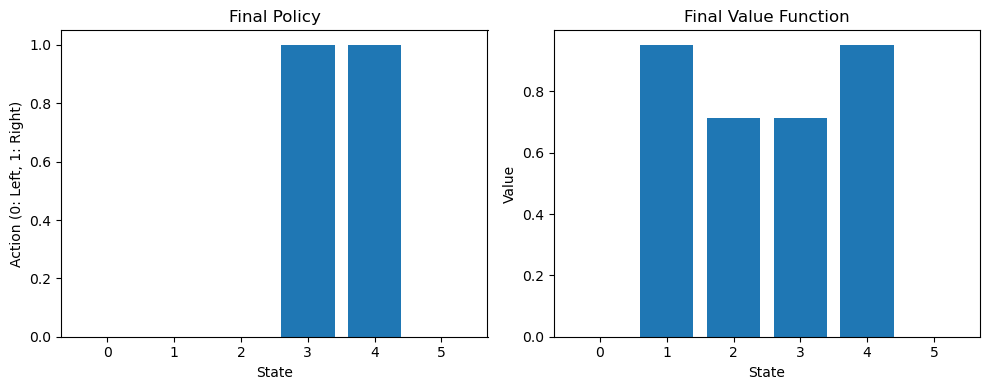

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

class PolicyIteration:
    def __init__(self, mdp):
        self.mdp = mdp
        self.states = mdp['states']
        self.actions = mdp['actions']
        self.terminal_states = mdp['terminal_states']
        self.transition_probabilities = mdp['transition_probabilities']
        self.reward_function = mdp['reward_function']
        self.gamma = 0.9
        self.policy = np.zeros(len(self.states), dtype=int)
        for s in self.states:
            if s not in self.terminal_states:
                self.policy[s] = np.random.choice(self.actions)
        self.V = np.zeros(len(self.states))

    def policy_evaluation(self, policy, epsilon=1e-5):
        V = np.copy(self.V)
        while True:
            delta = 0
            V_new = np.copy(V)
            for s in self.states:
                if s in self.terminal_states:
                    V_new[s] = 0
                    continue
                a = policy[s]
                V_new[s] = 0
                for s_prime in self.states:
                    p = self.transition_probabilities[s, a, s_prime]
                    r = self.reward_function[s, a, s_prime]
                    V_new[s] += p * (r + self.gamma * V[s_prime])
                delta = max(delta, abs(V_new[s] - V[s]))
            V = V_new
            if delta < epsilon:
                break
        self.V = V
        return V

    def policy_improvement(self, value_function):
        policy = np.copy(self.policy)
        policy_stable = True
        for s in self.states:
            if s in self.terminal_states:
                continue
            old_action = policy[s]
            action_values = np.zeros(len(self.actions))
            for a in self.actions:
                for s_prime in self.states:
                    p = self.transition_probabilities[s, a, s_prime]
                    r = self.reward_function[s, a, s_prime]
                    action_values[a] += p * (r + self.gamma * value_function[s_prime])
                policy[s] = np.argmax(action_values)
            if old_action != policy[s]:
                policy_stable = False
        self.policy = policy
        return policy, policy_stable

    def run(self, max_iterations=100):
        for i in range(max_iterations):
            value_function = self.policy_evaluation(self.policy)
            new_policy, policy_stable = self.policy_improvement(value_function)
            if policy_stable:
                print(f"Policy converged after {i+1} iterations")
                break
        return self.policy, self.V

if __name__ == '__main__':
    # Define vacuum_mdp
    vacuum_mdp = dict()
    vacuum_mdp['states'] = np.arange(6)
    vacuum_mdp['terminal_states'] = [0, 5]
    vacuum_mdp['actions'] = np.arange(2)
    vacuum_mdp['transition_probabilities'] = np.zeros((6, 2, 6))
    vacuum_mdp['transition_probabilities'][0, :, 0] = 1.0
    vacuum_mdp['transition_probabilities'][1, 0, 0] = 0.8
    vacuum_mdp['transition_probabilities'][1, 0, 1] = 0.2
    vacuum_mdp['transition_probabilities'][1, 1, 2] = 0.8
    vacuum_mdp['transition_probabilities'][1, 1, 1] = 0.2
    vacuum_mdp['transition_probabilities'][2, 0, 1] = 0.8
    vacuum_mdp['transition_probabilities'][2, 0, 2] = 0.2
    vacuum_mdp['transition_probabilities'][2, 1, 3] = 0.8
    vacuum_mdp['transition_probabilities'][2, 1, 2] = 0.2
    vacuum_mdp['transition_probabilities'][3, 0, 2] = 0.8
    vacuum_mdp['transition_probabilities'][3, 0, 3] = 0.2
    vacuum_mdp['transition_probabilities'][3, 1, 4] = 0.8
    vacuum_mdp['transition_probabilities'][3, 1, 3] = 0.2
    vacuum_mdp['transition_probabilities'][4, 0, 3] = 0.8
    vacuum_mdp['transition_probabilities'][4, 0, 4] = 0.2
    vacuum_mdp['transition_probabilities'][4, 1, 5] = 0.8
    vacuum_mdp['transition_probabilities'][4, 1, 4] = 0.2
    vacuum_mdp['transition_probabilities'][5, :, 5] = 1.0
    vacuum_mdp['reward_function'] = np.zeros((6, 2, 6))
    vacuum_mdp['reward_function'][1, 0, 0] = 1.0
    vacuum_mdp['reward_function'][4, 1, 5] = 1.0
    for s in [1, 2, 3, 4]:
        for a in [0, 1]:
            for s_prime in [1, 2, 3, 4]:
                if vacuum_mdp['transition_probabilities'][s, a, s_prime] > 0:
                    vacuum_mdp['reward_function'][s, a, s_prime] = -0.1

    # Test policy iteration
    print("Running Policy Iteration with State Values")
    pi = PolicyIteration(vacuum_mdp)
    policy, value_function = pi.run(max_iterations=100)

    # Visualize results
    print("Final Policy (0: Left, 1: Right):", policy)
    print("Final Value Function:", value_function)
    print("Current working directory:", os.getcwd())

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(vacuum_mdp['states'], policy)
    plt.xlabel('State')
    plt.ylabel('Action (0: Left, 1: Right)')
    plt.title('Final Policy')
    plt.subplot(1, 2, 2)
    plt.bar(vacuum_mdp['states'], value_function)
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.title('Final Value Function')
    plt.tight_layout()

    # Save plot with error handling
    try:
        plt.savefig('policy_iteration_results.png')
        print("Plot saved as 'policy_iteration_results.png'")
    except Exception as e:
        print(f"Error saving plot: {e}")

    # Display plot
    plt.show()
    plt.close()

### **1.3 D: (3 P)** Adapt your implementation to use Q-Values (state-action values) instead of state values to evaluate a given policy. Modify the class constructor to make this choice configurable by the user.

Running Policy Iteration with Q-Values
Policy converged after 3 iterations
Final Policy (0: Left, 1: Right): [0 0 0 1 1 0]
Final Q-Values:
 [[ 0.          0.        ]
 [ 0.95121951 -0.1       ]
 [ 0.71326502 -0.19      ]
 [-0.19        0.71326502]
 [-0.1         0.95121951]
 [ 0.          0.        ]]
Current working directory: C:\Users\M AHSAN\RL_ex01
Plot saved as 'policy_iteration_q_results.png'


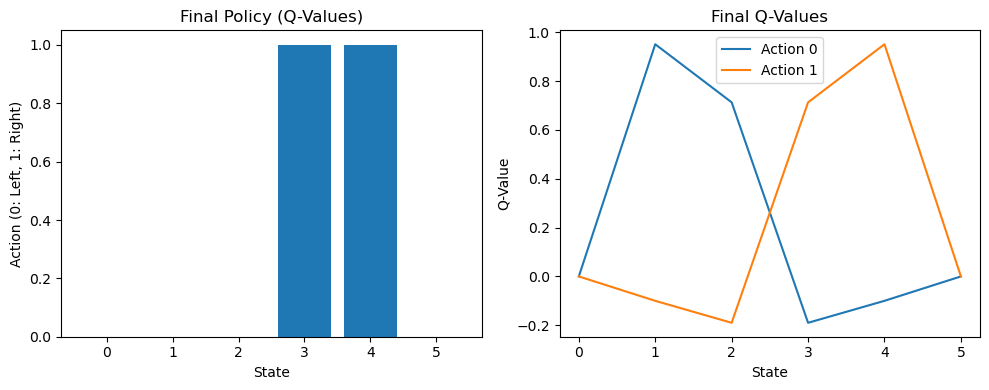

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

class PolicyIteration:
    def __init__(self, mdp, use_q_values=False):
        self.mdp = mdp
        self.use_q_values = use_q_values
        self.states = mdp['states']
        self.actions = mdp['actions']
        self.terminal_states = mdp['terminal_states']
        self.transition_probabilities = mdp['transition_probabilities']
        self.reward_function = mdp['reward_function']
        self.gamma = 0.9
        self.policy = np.zeros(len(self.states), dtype=int)
        for s in self.states:
            if s not in self.terminal_states:
                self.policy[s] = np.random.choice(self.actions)
        if self.use_q_values:
            self.Q = np.zeros((len(self.states), len(self.actions)))
        else:
            self.V = np.zeros(len(self.states))

    def policy_evaluation(self, policy, epsilon=1e-5):
        if self.use_q_values:
            while True:
                delta = 0
                Q_new = np.copy(self.Q)
                for s in self.states:
                    if s in self.terminal_states:
                        continue
                    a = policy[s]
                    Q_new[s, a] = 0
                    for s_prime in self.states:
                        p = self.transition_probabilities[s, a, s_prime]
                        r = self.reward_function[s, a, s_prime]
                        Q_new[s, a] += p * (r + self.gamma * np.max(self.Q[s_prime, :]))
                    delta = max(delta, abs(Q_new[s, a] - self.Q[s, a]))
                self.Q = Q_new
                if delta < epsilon:
                    break
            return None
        else:
            V = np.copy(self.V)
            while True:
                delta = 0
                V_new = np.copy(V)
                for s in self.states:
                    if s in self.terminal_states:
                        V_new[s] = 0
                        continue
                    a = policy[s]
                    V_new[s] = 0
                    for s_prime in self.states:
                        p = self.transition_probabilities[s, a, s_prime]
                        r = self.reward_function[s, a, s_prime]
                        V_new[s] += p * (r + self.gamma * V[s_prime])
                    delta = max(delta, abs(V_new[s] - V[s]))
                V = V_new
                if delta < epsilon:
                    break
            self.V = V
            return V

    def policy_improvement(self, value_function):
        policy = np.copy(self.policy)
        policy_stable = True
        for s in self.states:
            if s in self.terminal_states:
                continue
            old_action = policy[s]
            if self.use_q_values:
                policy[s] = np.argmax(self.Q[s, :])
            else:
                action_values = np.zeros(len(self.actions))
                for a in self.actions:
                    for s_prime in self.states:
                        p = self.transition_probabilities[s, a, s_prime]
                        r = self.reward_function[s, a, s_prime]
                        action_values[a] += p * (r + self.gamma * value_function[s_prime])
                policy[s] = np.argmax(action_values)
            if old_action != policy[s]:
                policy_stable = False
        self.policy = policy
        return policy, policy_stable

    def run(self, max_iterations=100):
        for i in range(max_iterations):
            value_function = self.policy_evaluation(self.policy)
            new_policy, policy_stable = self.policy_improvement(value_function)
            if policy_stable:
                print(f"Policy converged after {i+1} iterations")
                break
        if self.use_q_values:
            return self.policy, self.Q
        else:
            return self.policy, self.V

if __name__ == '__main__':
    # Define vacuum_mdp
    vacuum_mdp = dict()
    vacuum_mdp['states'] = np.arange(6)
    vacuum_mdp['terminal_states'] = [0, 5]
    vacuum_mdp['actions'] = np.arange(2)
    vacuum_mdp['transition_probabilities'] = np.zeros((6, 2, 6))
    vacuum_mdp['transition_probabilities'][0, :, 0] = 1.0
    vacuum_mdp['transition_probabilities'][1, 0, 0] = 0.8
    vacuum_mdp['transition_probabilities'][1, 0, 1] = 0.2
    vacuum_mdp['transition_probabilities'][1, 1, 2] = 0.8
    vacuum_mdp['transition_probabilities'][1, 1, 1] = 0.2
    vacuum_mdp['transition_probabilities'][2, 0, 1] = 0.8
    vacuum_mdp['transition_probabilities'][2, 0, 2] = 0.2
    vacuum_mdp['transition_probabilities'][2, 1, 3] = 0.8
    vacuum_mdp['transition_probabilities'][2, 1, 2] = 0.2
    vacuum_mdp['transition_probabilities'][3, 0, 2] = 0.8
    vacuum_mdp['transition_probabilities'][3, 0, 3] = 0.2
    vacuum_mdp['transition_probabilities'][3, 1, 4] = 0.8
    vacuum_mdp['transition_probabilities'][3, 1, 3] = 0.2
    vacuum_mdp['transition_probabilities'][4, 0, 3] = 0.8
    vacuum_mdp['transition_probabilities'][4, 0, 4] = 0.2
    vacuum_mdp['transition_probabilities'][4, 1, 5] = 0.8
    vacuum_mdp['transition_probabilities'][4, 1, 4] = 0.2
    vacuum_mdp['transition_probabilities'][5, :, 5] = 1.0
    vacuum_mdp['reward_function'] = np.zeros((6, 2, 6))
    vacuum_mdp['reward_function'][1, 0, 0] = 1.0
    vacuum_mdp['reward_function'][4, 1, 5] = 1.0
    for s in [1, 2, 3, 4]:
        for a in [0, 1]:
            for s_prime in [1, 2, 3, 4]:
                if vacuum_mdp['transition_probabilities'][s, a, s_prime] > 0:
                    vacuum_mdp['reward_function'][s, a, s_prime] = -0.1

    # Test policy iteration with Q-values
    print("Running Policy Iteration with Q-Values")
    pi_q = PolicyIteration(vacuum_mdp, use_q_values=True)
    policy_q, Q_values = pi_q.run(max_iterations=100)

    # Visualize results
    print("Final Policy (0: Left, 1: Right):", policy_q)
    print("Final Q-Values:\n", Q_values)
    print("Current working directory:", os.getcwd())

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(vacuum_mdp['states'], policy_q)
    plt.xlabel('State')
    plt.ylabel('Action (0: Left, 1: Right)')
    plt.title('Final Policy (Q-Values)')
    plt.subplot(1, 2, 2)
    for a in vacuum_mdp['actions']:
        plt.plot(vacuum_mdp['states'], Q_values[:, a], label=f'Action {a}')
    plt.xlabel('State')
    plt.ylabel('Q-Value')
    plt.title('Final Q-Values')
    plt.legend()
    plt.tight_layout()

    # Save plot with error handling
    try:
        plt.savefig('policy_iteration_q_results.png')
        print("Plot saved as 'policy_iteration_q_results.png'")
    except Exception as e:
        print(f"Error saving plot: {e}")

    # Display plot
    plt.show()
    plt.close()

<div align="center" style="font-family: 'Garamond', serif; color: #333333;">
    <hr style="border-top: 2px solid #8b0000; width: 100%;">
    <p style="color: #6c757d;">
        Please upload your submission via StudIP by 20:00 on April 24, 2024. If you encounter any issues with the upload process, please contact me in advance at <a href="mailto:laux@uni-bremen.de" style="color: #8b0000;">laux@uni-bremen.de</a>. Your submission must include:
    </p>
    <ul style="list-style-type: none; color: #6c757d;">
        <li>&#9472; A well-documented, precompiled notebook, containing the entire solution(s) along with outputs and plots if applicable</li>
        <li>&#9472; A markdown cell with the names and e-mail addresses of the contributing team members</li>
    </ul>
    <hr style="border-top: 2px solid #8b0000; width: 100%;">
</div>